# Implementing Q-Learning

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import warehouse_robot_env as wr

def run_q_learning(episodes, is_training=True, render=False, stochastic=False, discount_factor_g=0.9, epsilon_decay=0.99):
    
    env = gym.make('warehouse-robot-v0', render_mode='human' if render else None, stochastic=stochastic)

    if(is_training):
        q = np.zeros((env.unwrapped.grid_rows, env.unwrapped.grid_cols, 3, env.action_space.n))
        print("################################################################################")
        print("                         Q-values Initial:")
        print("################################################################################")
        print(q)

    else:
        if stochastic:
            f = open('v0_warehouse_solution_stochastic.pkl', 'rb')
        else:
            f = open('v0_warehouse_solution_without_stochastic.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    learning_rate_a = 0.9
    epsilon = 1.0

    steps_per_episode = np.zeros(episodes)

    step_count=0
    epsilons = []
    rewards = []

    for i in range(episodes):
        if(render):
            print(f'Episode {i}')

        state = env.reset()[0]
        terminated = False
        current_reward = 0
        while(not terminated):
            if is_training and random.random() < epsilon:
                action = env.action_space.sample()
            else:                
                q_state_idx = tuple(state) 

                action = np.argmax(q[q_state_idx])
            
            new_state,reward,terminated,_,_ = env.step(action)

            current_reward += reward

            q_state_action_idx = tuple(state) + (action,)

            q_new_state_idx = tuple(new_state)

            if is_training:
                q[q_state_action_idx] = q[q_state_action_idx] + learning_rate_a * (
                        reward + discount_factor_g * np.max(q[q_new_state_idx]) - q[q_state_action_idx]
                )

            state = new_state

            step_count+=1
            if terminated:
                steps_per_episode[i] = step_count
                step_count = 0

        epsilon = epsilon * epsilon_decay
        epsilons.append(epsilon)
        rewards.append(current_reward)

    env.close()

    sum_steps = np.zeros(episodes)
    for t in range(episodes):
        sum_steps[t] = np.mean(steps_per_episode[max(0, t-100):(t+1)])
    plt.xlabel('Episodes')
    plt.ylabel('Total reward per episode')
    plt.plot(rewards)
    plt.title("Total reward per episode VS Episodes")
    plt.show()
    if is_training:
        plt.xlabel('Episodes')
        plt.ylabel('Epsilon Value')
        plt.plot(epsilons)
        plt.title("Epsilon Value VS Episodes")
        plt.show()
        plt.xlabel('Episodes')
        plt.ylabel('Step count')
        plt.plot(sum_steps)
        plt.title("Number of steps VS Episodes")
        plt.show()
        
    print("################################################################################")
    print("                       Q-values after training:")
    print("################################################################################")

    print(q)
    if is_training:
        if stochastic:
            f = open("v0_warehouse_solution_stochastic.pkl","wb")
        else:
            f = open("v0_warehouse_solution_without_stochastic.pkl","wb")
        pickle.dump(q, f)
        f.close()

## Running Q-Learning for Non-Stochastic Environement

### Training the Non-Stochastic Environement model for 1000 episodes

################################################################################
                         Q-values Initial:
################################################################################
[[[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0.

/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be int32, actual type: int64
  logger.warn(
/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be int32, actual type: int64
  logger.warn(
/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `step()` method is not

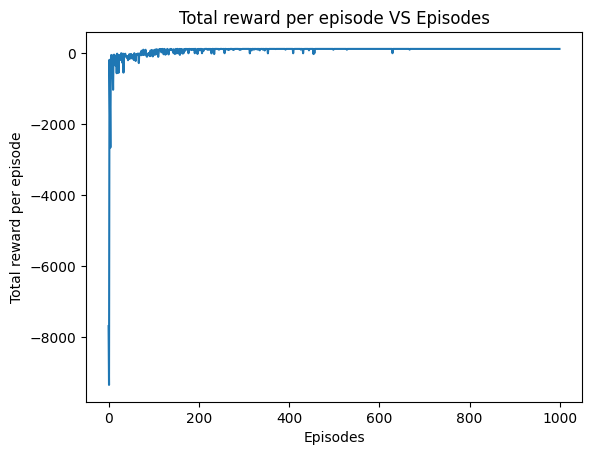

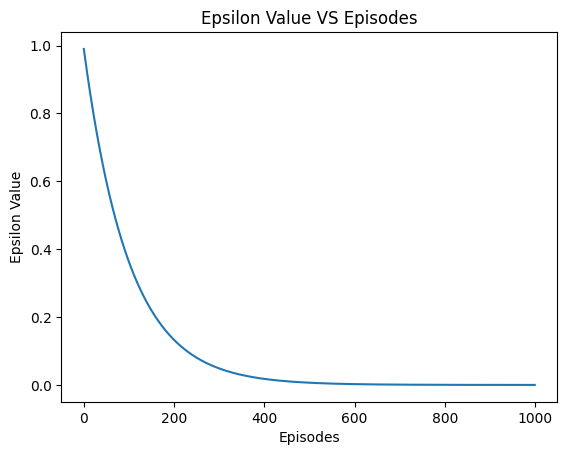

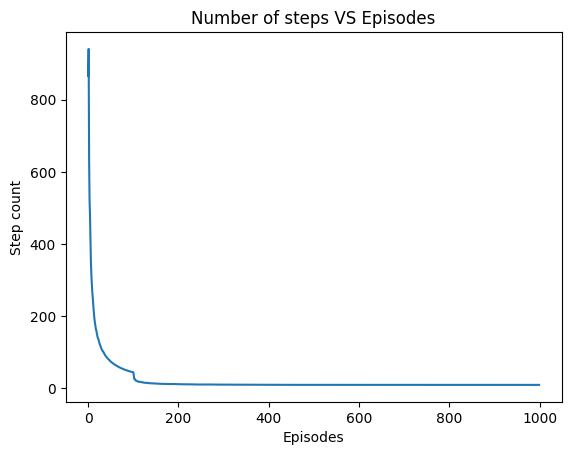

################################################################################
                       Q-values after training:
################################################################################
[[[[ 3.91147850e+02  4.45831882e+02  4.45824811e+02  3.91232882e+02
     3.74288722e+02  3.81246540e+02]
   [-1.17055850e+01 -3.92998196e+00 -3.89774592e+00 -1.29682216e+01
    -2.16892231e+01 -9.18403375e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 1.37911732e+01  4.96479589e+02  1.40344392e+01  3.93649112e+02
    -3.03216376e+00 -2.56617378e+00]
   [-4.36056487e+00 -3.34602452e+00 -3.28767048e+00 -1.15483762e+01
    -2.28895224e+01 -8.11864715e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 1.60492822e+01  1.66619723e+01  1.24756358e+01  5.88576067e+00
    -4.14039865e+00 -4.13806429e+00]
   [-3.72223272e+00  5.26744949e+02 -2.54952011e+00

In [2]:
run_q_learning(1000, is_training=True, render=False, stochastic=False)


### Running the greedy steps for 10 episodes

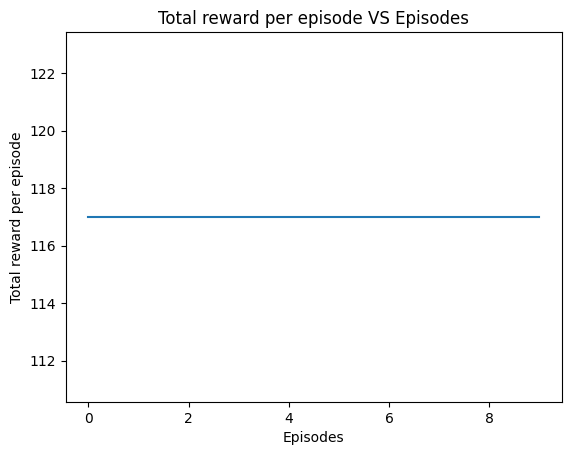

################################################################################
                       Q-values after training:
################################################################################
[[[[ 3.52118565e+02  4.02354694e+02  3.23728506e+02  3.51890728e+02
     3.38282894e+02  3.41657517e+02]
   [-1.07280000e+01 -4.81972210e+00 -5.10071542e+00 -1.06290000e+01
    -2.22455784e+01 -1.02050227e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 3.61118592e+02  8.02728784e+01  1.37511256e+01  2.88560339e+02
     2.25348402e+02 -3.03371424e+00]
   [-5.26190360e+00 -4.91886975e+00  3.75184381e+02 -1.41427673e+01
    -2.22885228e+01 -8.55943033e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 1.63815987e+01  1.55387760e+01  1.23711255e+01  5.85953355e+00
    -5.19992046e+00 -5.14383230e+00]
   [-4.80877514e+00  4.23962680e+02 -4.06768491e+00

: 

In [4]:
run_q_learning(10, is_training=False, render=False, stochastic=False)

### Rendering the model for 1 episode for Non-stochastic environment

2025-02-20 01:01:58.502 Python[89159:3360288] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-20 01:01:58.502 Python[89159:3360288] +[IMKInputSession subclass]: chose IMKInputSession_Modern


_ _ _ _ _ _ 
_ S _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
R _ _ _ _ _ 

Episode 0
_ _ _ _ _ _ 
_ S _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
R _ _ _ _ _ 

RobotAction.UP
_ _ _ _ _ _ 
_ S _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
R _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.UP
_ _ _ _ _ _ 
_ S _ _ _ _ 
_ _ _ O _ _ 
R _ O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.RIGHT
_ _ _ _ _ _ 
_ S _ _ _ _ 
_ _ _ O _ _ 
_ R O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.UP
_ _ _ _ _ _ 
_ S _ _ _ _ 
_ R _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.UP
_ _ _ _ _ _ 
_ R _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.PICKUP
_ _ _ _ _ _ 
_ R _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.RIGHT
_ _ _ _ _ _ 
_ _ R _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.RIGHT
_ _ _ _ _ _ 
_ _ _ R _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.RIGHT
_ _ _ _ _ _ 
_ _ _ _ R _ 
_ _ _ O _ _ 
_ _ O _ _ 

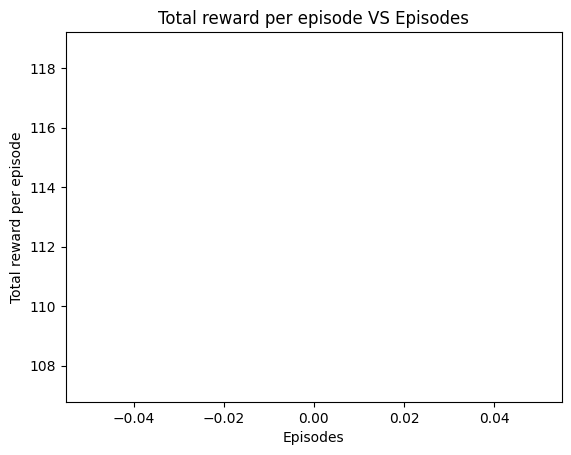

################################################################################
                       Q-values after training:
################################################################################
[[[[ 5.35978498e+01  8.26163582e+01  1.59007155e+01  5.85971468e+00
    -4.66862636e+00 -4.67011693e+00]
   [-1.37816511e+01 -5.42849701e+00 -5.07224491e+00 -1.37699086e+01
    -2.26687481e+01 -1.00660292e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 1.34774624e+01  4.04591602e+02  1.38655210e+01  6.89966801e+00
    -2.60342242e+00  1.22089941e+02]
   [-5.11424113e+00 -5.11946699e+00  4.20457439e+02 -1.22690350e+01
    -2.27707196e+01 -7.49222479e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 1.60005952e+01  1.61110026e+01  1.20055262e+01  4.91101514e+00
    -4.61347286e+00 -4.60826516e+00]
   [-5.01683240e+00 -4.53581812e+00  4.72954835e+02

: 

In [4]:
run_q_learning(1, is_training=False, render=True, stochastic=False)

## Running Q-Learning for Stochastic Environement

### Traning the Stochastic Environment model for 1000 episodes

################################################################################
                         Q-values Initial:
################################################################################
[[[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0.

2025-02-20 01:13:12.004 Python[96875:3382867] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-20 01:13:12.004 Python[96875:3382867] +[IMKInputSession subclass]: chose IMKInputSession_Modern


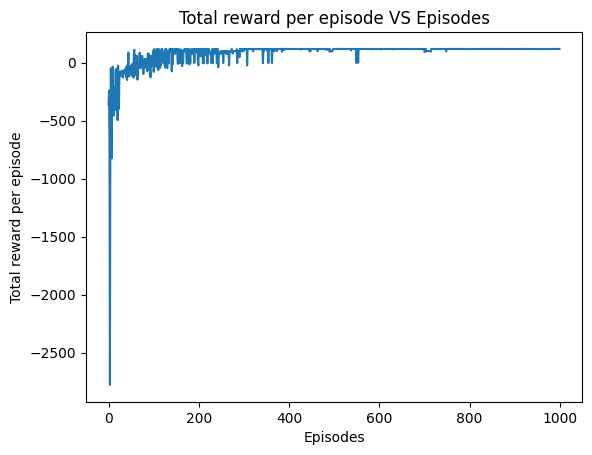

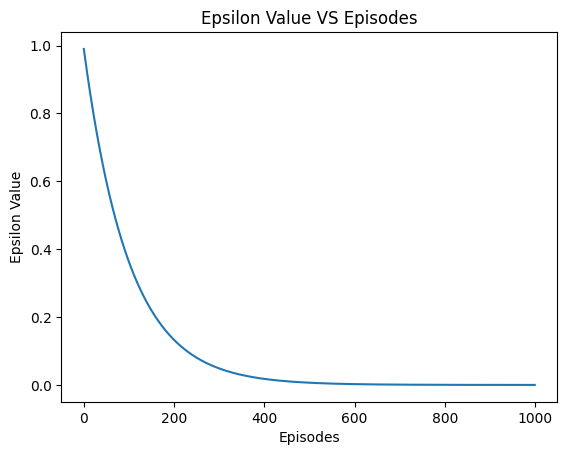

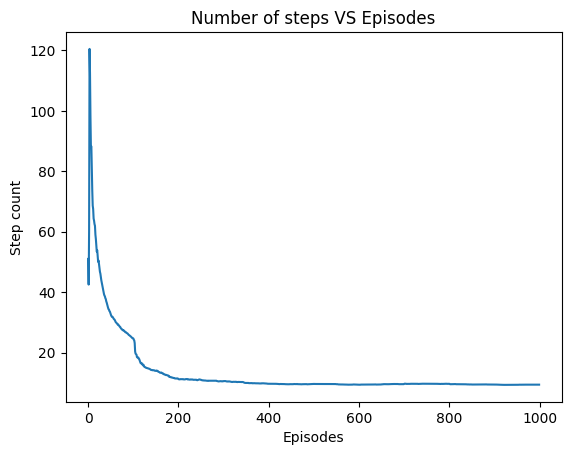

################################################################################
                       Q-values after training:
################################################################################
[[[[ 3.91046785e+02  4.44361462e+02  4.04806975e+02  3.89516790e+02
     3.79282182e+02  3.79572225e+02]
   [-9.00000000e+00  3.59054143e+02 -2.62801711e+00 -1.19648283e+01
    -1.80000000e+01 -1.10038152e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 3.97967115e+02  4.96479865e+02  2.15415464e+02  4.36308340e+02
     3.46963338e+02  4.16598480e+02]
   [-3.11764281e+00 -2.62708183e+00  2.02846782e+02 -1.16153624e+01
    -2.08987299e+01 -6.80900291e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 2.79560325e+02  1.75638253e+02  1.23835547e+01  5.90459737e+00
    -4.17652379e+00 -4.10788243e+00]
   [-2.72552392e+00 -1.88199000e+00 -1.88938719e+00

In [3]:
run_q_learning(1000, is_training=True, render=False, stochastic=True)


### Running the model with greedy steps for 10 episodes

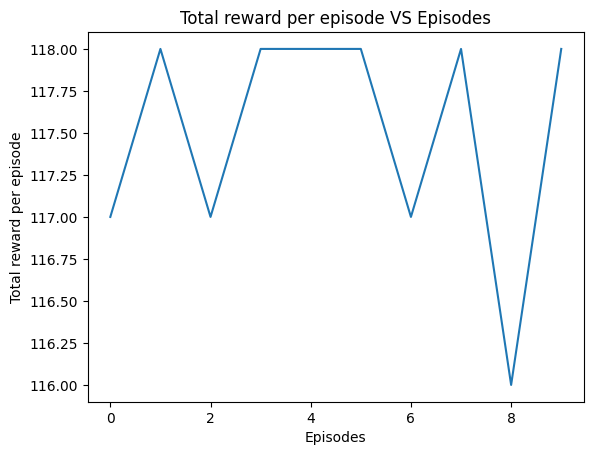

################################################################################
                       Q-values after training:
################################################################################
[[[[ 3.91046785e+02  4.44361462e+02  4.04806975e+02  3.89516790e+02
     3.79282182e+02  3.79572225e+02]
   [-9.00000000e+00  3.59054143e+02 -2.62801711e+00 -1.19648283e+01
    -1.80000000e+01 -1.10038152e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 3.97967115e+02  4.96479865e+02  2.15415464e+02  4.36308340e+02
     3.46963338e+02  4.16598480e+02]
   [-3.11764281e+00 -2.62708183e+00  2.02846782e+02 -1.16153624e+01
    -2.08987299e+01 -6.80900291e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 2.79560325e+02  1.75638253e+02  1.23835547e+01  5.90459737e+00
    -4.17652379e+00 -4.10788243e+00]
   [-2.72552392e+00 -1.88199000e+00 -1.88938719e+00

In [8]:
run_q_learning(10, is_training=False, render=False, stochastic=True)

### Rendering the model for 1 episode for Stochastic environment

2025-02-20 01:03:43.499 Python[90330:3364136] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-20 01:03:43.499 Python[90330:3364136] +[IMKInputSession subclass]: chose IMKInputSession_Modern


_ _ _ _ _ _ 
_ S _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
R _ _ _ _ _ 

Episode 0
_ _ _ _ _ _ 
_ S _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
R _ _ _ _ _ 

RobotAction.UP
_ _ _ _ _ _ 
_ S _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
R _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.UP
_ _ _ _ _ _ 
_ S _ _ _ _ 
_ _ _ O _ _ 
R _ O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.UP
_ _ _ _ _ _ 
_ S _ _ _ _ 
R _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.UP
_ _ _ _ _ _ 
R S _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.RIGHT
_ _ _ _ _ _ 
_ R _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.PICKUP
_ _ _ _ _ _ 
_ R _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.DOWN
_ _ _ _ _ _ 
_ _ _ _ _ _ 
_ R _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.DOWN
_ _ _ _ _ _ 
_ _ _ _ _ _ 
_ _ _ O _ _ 
_ R O _ _ _ 
_ _ _ O _ T 
_ _ _ _ _ _ 

RobotAction.DOWN
_ _ _ _ _ _ 
_ _ _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 


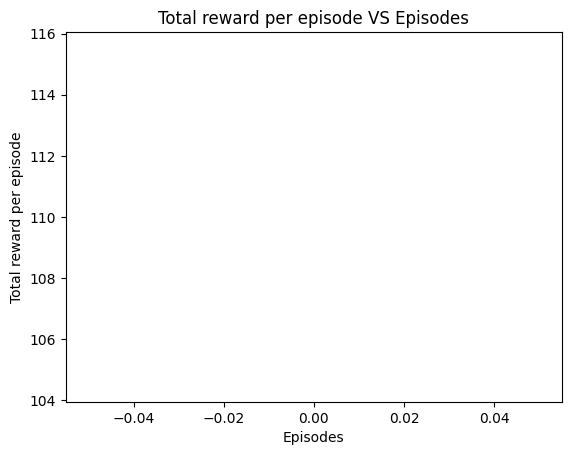

################################################################################
                       Q-values after training:
################################################################################
[[[[ 5.86561567e+00  1.55931734e+01  1.55327051e+01  5.85697943e+00
    -4.16005666e+00 -4.14105149e+00]
   [-1.18888439e+01 -5.05487407e+00 -5.16481246e+00 -1.28699614e+01
    -2.29203797e+01 -9.12833619e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 1.38616362e+01  3.28969430e+02  1.39995280e+01  6.13305106e+00
    -1.37170706e+00 -3.36336229e+00]
   [-5.45302422e+00  3.37654864e+02 -5.43929718e+00 -1.39396995e+01
    -2.34886981e+01 -8.90100198e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 1.64053330e+01  1.65574493e+01  1.46214695e+01  5.86559309e+00
    -4.13435256e+00 -4.13924331e+00]
   [-4.93679027e+00 -5.05216009e+00 -4.50048688e+00

: 

In [3]:
run_q_learning(1, is_training=False, render=True, stochastic=True)

## Hyperparameter Tuning

### Tuning Discount Factor with value 0.01

################################################################################
                         Q-values Initial:
################################################################################
[[[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0.

/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be int32, actual type: int64
  logger.warn(
/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be int32, actual type: int64
  logger.warn(
/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `step()` method is not

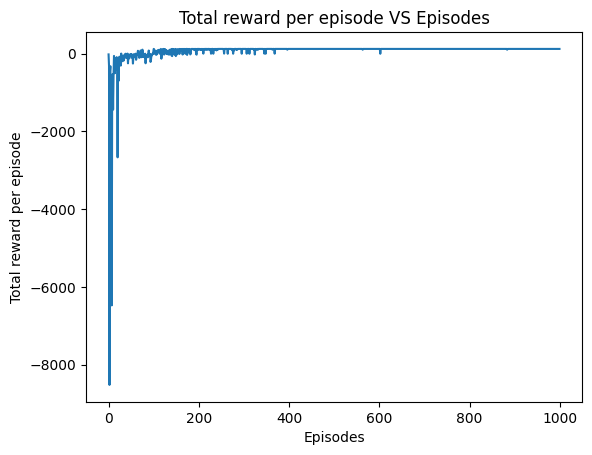

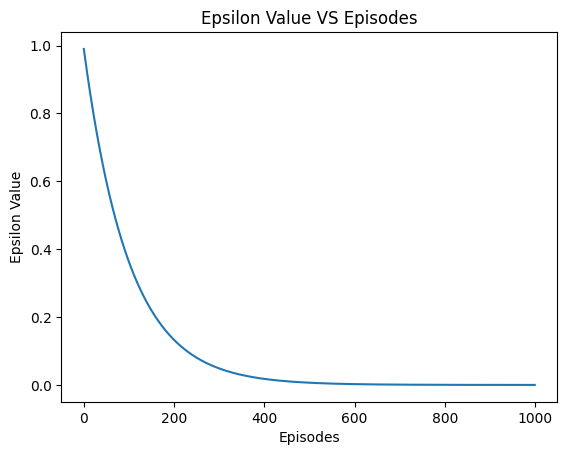

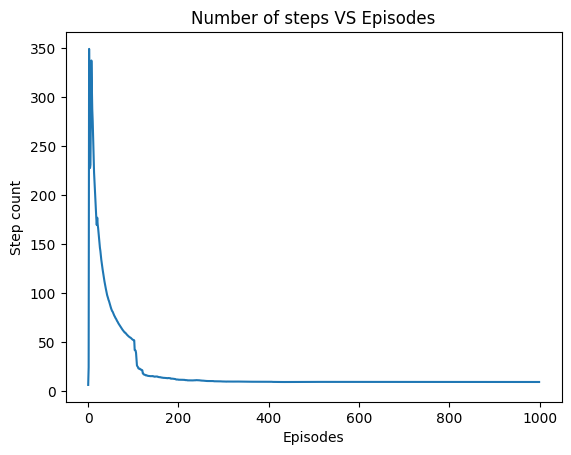

################################################################################
                       Q-values after training:
################################################################################
[[[[-1.00100750e+01 -1.00750101e+00 -1.00750101e+00 -1.00100750e+01
    -2.00100750e+01 -2.00100750e+01]
   [-1.00099719e+01 -1.01010101e+00 -1.01010101e+00 -9.90908009e+00
    -1.99899999e+01 -2.50098240e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[-1.01007501e+00 -7.50101010e-01 -1.01007501e+00 -1.00075010e+01
    -2.00075010e+01 -2.00075010e+01]
   [-1.01010101e+00 -1.01010101e+00 -1.01010101e+00 -1.00101010e+01
    -2.00098990e+01 -2.50072509e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[-1.00750101e+00 -1.00750101e+00 -1.01010075e+00 -1.00100750e+01
    -2.00100750e+01 -2.00100750e+01]
   [-1.01010101e+00 -1.01010100e+00 -1.01010100e+00

In [18]:
run_q_learning(1000, is_training=True, render=False, stochastic=False, discount_factor_g=0.01)

### Tuning Discount Factor with value 0.5

2025-02-20 12:24:17.209 Python[52807:4594243] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-20 12:24:17.209 Python[52807:4594243] +[IMKInputSession subclass]: chose IMKInputSession_Modern


################################################################################
                         Q-values Initial:
################################################################################
[[[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0.

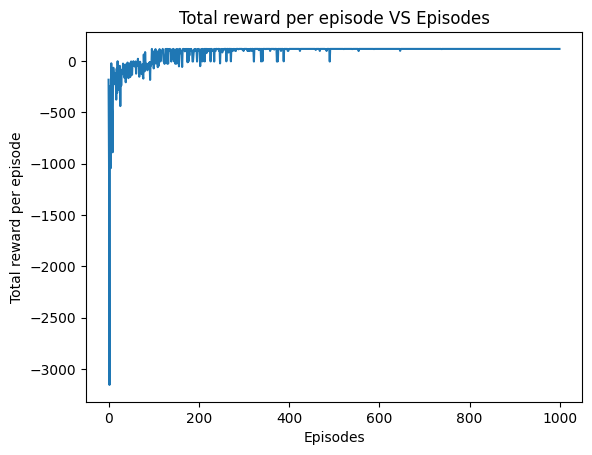

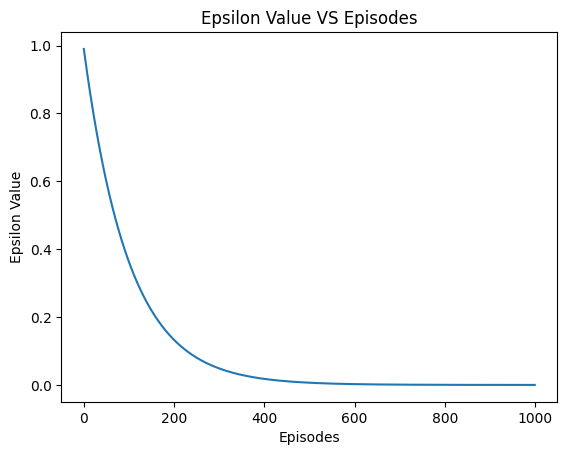

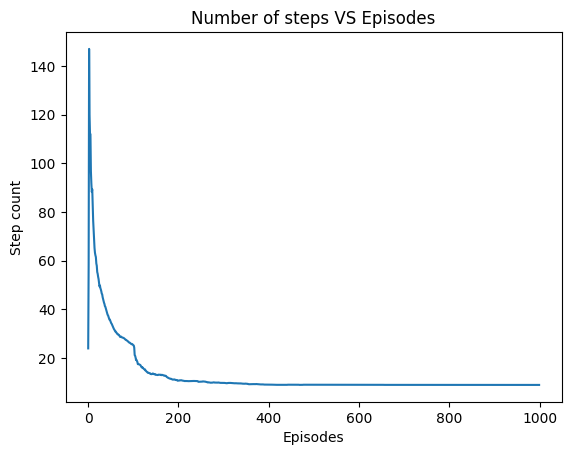

################################################################################
                       Q-values after training:
################################################################################
[[[[ -7.35548116   5.28906084   5.2890625   -7.35546875 -17.35549188
    -17.35546899]
   [-10.69152975  -1.92766781  -0.46581889 -10.4445     -20.2455
    -22.71533619]
   [  0.           0.           0.           0.           0.
      0.        ]]

  [[  1.64450779  12.578125     1.64452879  -3.71094436 -13.71147996
    -13.71094594]
   [ -1.4806753    0.84767614   1.1562473  -10.90864058 -19.58249521
    -18.80839368]
   [  0.           0.           0.           0.           0.
      0.        ]]

  [[  5.28906242   4.51971329  -0.34350854  -7.68750918 -17.71241799
    -17.38919846]
   [ -1.93932453   4.31249998  -1.85485349 -10.4998405  -18.1422945
    -22.71257561]
   [  0.           0.           0.           0.           0.
      0.        ]]

  [[  1.3042795    1.31252467 

In [3]:
run_q_learning(1000, is_training=True, render=False, stochastic=False, discount_factor_g=0.5)

### Tuning Discount Factor with value 0.99

################################################################################
                         Q-values Initial:
################################################################################
[[[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0.

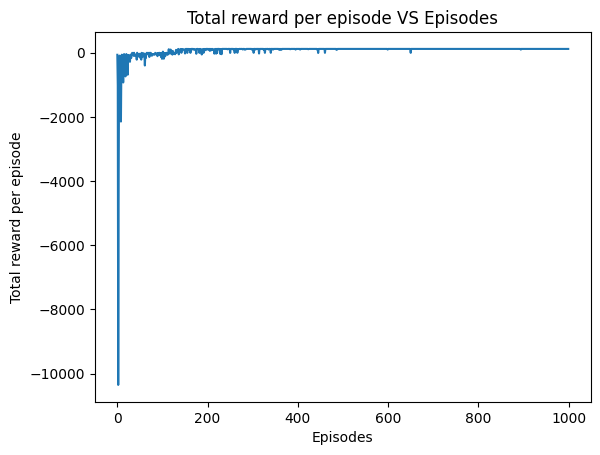

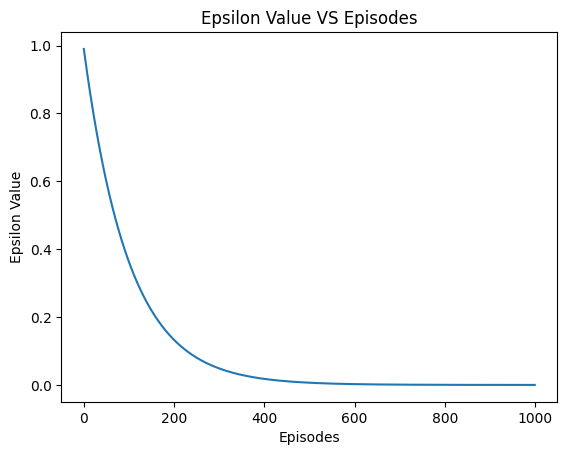

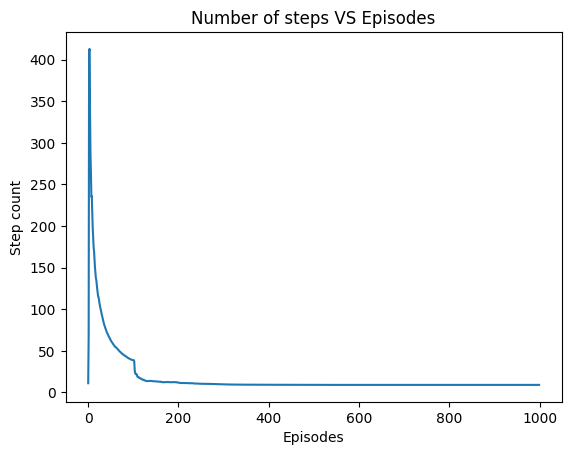

################################################################################
                       Q-values after training:
################################################################################
[[[[ 7.80967220e+03  9.24056386e+03  6.55861485e+03  4.62229361e+03
     7.65046061e+03  8.89106774e+03]
   [-1.29487378e+01 -5.32803015e+00  5.85495609e+03 -1.28605288e+01
    -2.09620800e+01 -5.73983370e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 1.68950150e+01  7.14823615e+03  1.88155811e+01  9.88514268e+00
     3.95331563e+03  4.11137834e-01]
   [-4.80483483e+00  6.63233407e+03 -5.48081204e+00 -1.18346363e+01
    -2.18803610e+01  1.07039542e+03]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 1.97380670e+01  1.89255172e+01  1.93978725e+01  1.22868920e+01
     1.57130897e+00  2.28737499e+00]
   [-4.66514465e+00 -4.67741039e+00  1.99654023e+02

In [4]:
run_q_learning(1000, is_training=True, render=False, stochastic=False, discount_factor_g=0.99)

## Conclusion for Discount Factor

We see that as the value for Discount factor increases(closer to 1), the model performs better. The graph for Total reward per episode has lesser noise for discount factor 0.5 compared to discount factor 0.01. The graph is even better (has less noise) for discount factor as 0.99. Thus, we can conclude that higher the discount factor, better is the performance of the model for our environment.

## Epsilon Decay with value 0.999

################################################################################
                         Q-values Initial:
################################################################################
[[[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0.

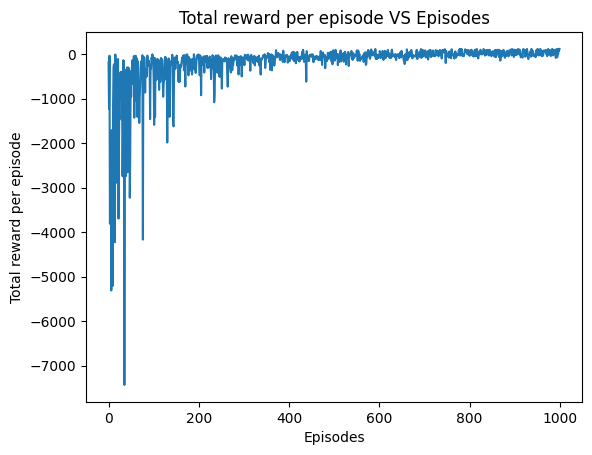

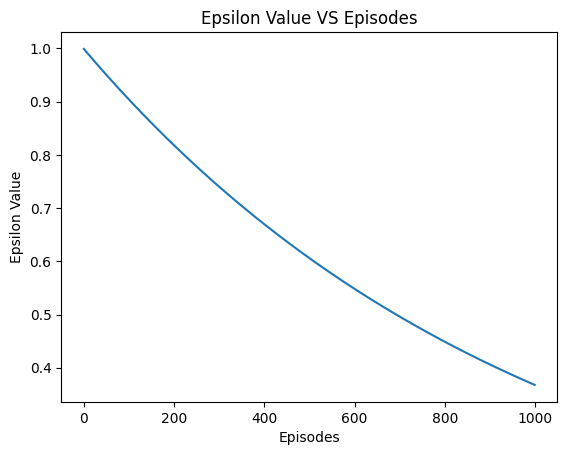

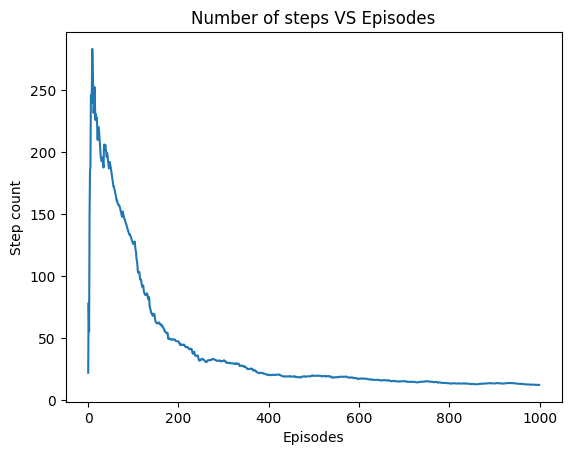

################################################################################
                       Q-values after training:
################################################################################
[[[[ 3.91248691e+02  4.45831882e+02  4.45831882e+02  3.91248694e+02
     3.81248694e+02  3.81248693e+02]
   [ 3.30596665e+02  4.28092551e+02  4.73061813e+02  4.12869048e+02
     4.04684727e+02  3.70641280e+02]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 4.00248693e+02  4.96479869e+02  4.00248693e+02  4.36831882e+02
     4.26831882e+02  4.26831882e+02]
   [ 4.23614908e+02  5.26755410e+02  5.26193383e+02  4.63996222e+02
     4.54078848e+02  4.20686321e+02]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 4.45811449e+02  4.45831882e+02  3.59158965e+02  3.91248539e+02
     3.81242523e+02  3.81245400e+02]
   [ 4.72788839e+02  5.86387635e+02  5.86394899e+02

In [22]:
run_q_learning(1000, is_training=True, render=False, stochastic=False, epsilon_decay=0.999)

## Epsilon Decay with value 0.7

################################################################################
                         Q-values Initial:
################################################################################
[[[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0.

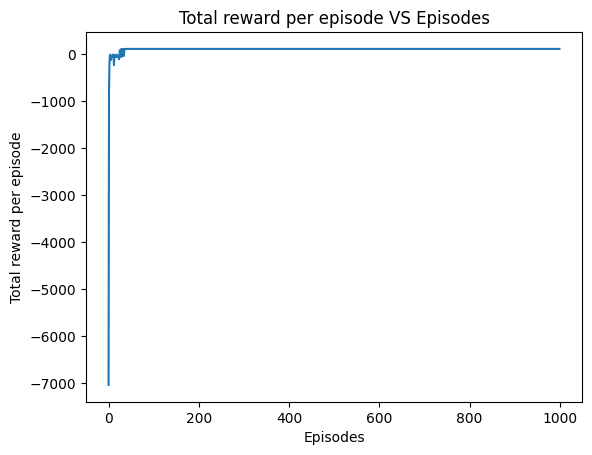

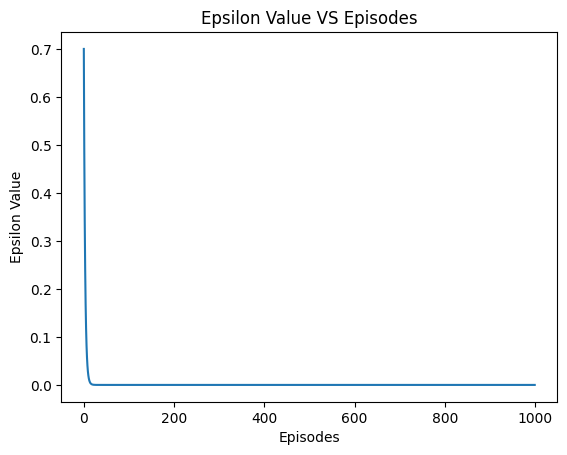

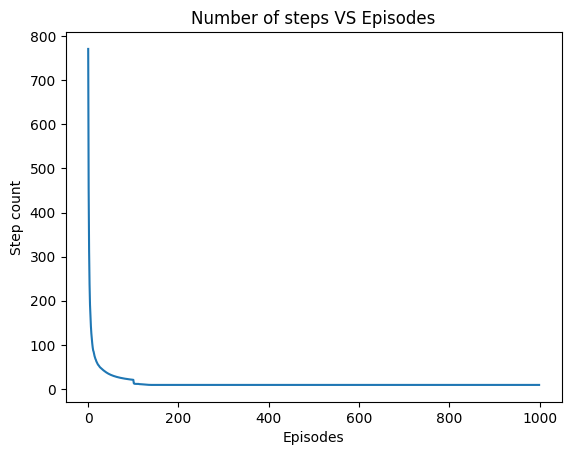

################################################################################
                       Q-values after training:
################################################################################
[[[[-1.08720900e+01  4.45831882e+02  1.29531600e+01 -9.00000000e+00
    -9.56740140e+00 -5.22564053e+00]
   [-9.00000000e+00 -3.68061274e+00 -3.60365068e+00 -9.00000000e+00
    -1.80000000e+01 -2.33019000e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[-9.00000000e-01  1.90476000e+01 -1.62900000e+00 -9.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [-3.35806589e+00 -4.32176475e+00 -3.32889246e+00 -9.00000000e+00
    -1.80000000e+01 -7.07144400e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 1.29630600e+01 -1.72800000e+00 -9.90000000e-01 -9.99900000e+00
    -2.07090000e+01 -1.80000000e+01]
   [-3.13615032e+00 -3.25851630e+00 -3.21102783e+00

In [20]:
run_q_learning(1000, is_training=True, render=False, stochastic=False, epsilon_decay=0.7)

## Epsilon Decay with value 0.01

################################################################################
                         Q-values Initial:
################################################################################
[[[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0.

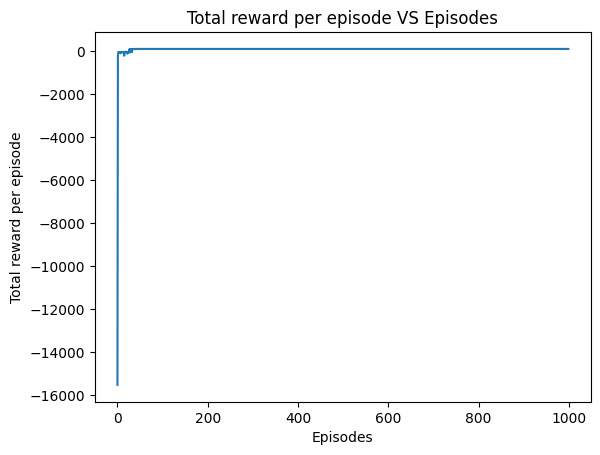

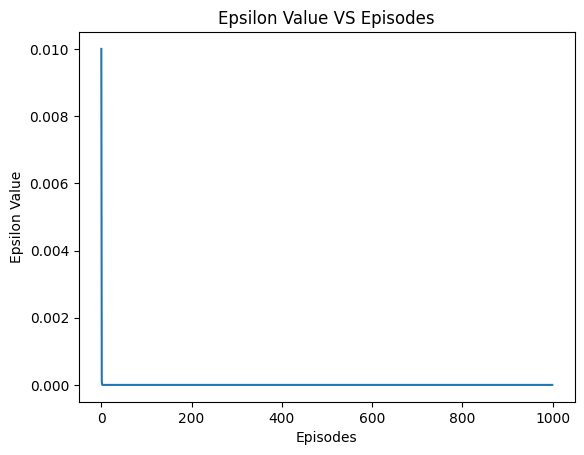

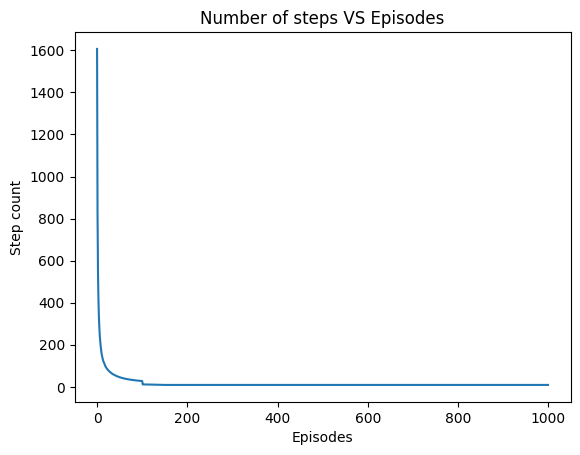

################################################################################
                       Q-values after training:
################################################################################
[[[[-1.15495199e+01 -1.89982899e+00  4.45831882e+02 -1.16865324e+01
    -2.16859422e+01 -2.16741973e+01]
   [-9.00000000e+00 -3.83766522e+00 -3.78578185e+00 -9.00000000e+00
    -1.80000000e+01 -8.21841648e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[-2.67354088e+00  4.96479869e+02 -1.72800000e+00 -1.08909009e+01
    -2.08909911e+01 -1.99800000e+01]
   [-3.85608504e+00 -3.98458558e+00 -3.87412468e+00 -9.00000000e+00
    -1.80000000e+01 -5.69686420e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[-1.88199000e+00 -9.90000000e-01 -9.99900000e-01 -1.08098190e+01
    -2.08071900e+01 -2.08089900e+01]
   [-4.22102581e+00 -3.24377325e+00 -3.33334493e+00

In [24]:
run_q_learning(1000, is_training=True, render=False, stochastic=False, epsilon_decay=0.01)

## Conclusion for Epsilon Decay

As we can see, for a lower epsilon decay, the model is able to stabalise quicker. With a lower epsilon decay rate, the exploration is really high which is helping the model to learn quicker. As, we can see in the graphs above, for an epsilon decay of 0.99, the max number of steps per episode (Y-Axis) is about 300. This number jumps upto 800 for an epsilon decay of 0.7. In the final comparison, we see that for an epsilon decay of 0.01, the number of steps goes upto 1600. Thus, we can conclude that for a simpler model (like the warehouse robot scenario), a lower epsilon decay perfroms better. This might not be the case for more complex models.

# Implementing Double-Q Learning

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import warehouse_robot_env as wr

def run_double_q_learning(episodes, is_training=True, render=False, stochastic=False):
    
    env = gym.make('warehouse-robot-v0', render_mode='human' if render else None, stochastic=stochastic)
    
    if is_training:
        q1 = np.zeros((env.unwrapped.grid_rows, env.unwrapped.grid_cols, 3, env.action_space.n))
        q2 = np.zeros((env.unwrapped.grid_rows, env.unwrapped.grid_cols, 3, env.action_space.n))
    else:
        if stochastic:
            with open('v0_warehouse_double_q_learning_stochastic_1.pkl', 'rb') as f1, open('v0_warehouse_double_q_learning_stochastic_2.pkl', 'rb') as f2:
                q1 = pickle.load(f1)
                q2 = pickle.load(f2)
        else:
            with open('v0_warehouse_double_q_learning_1.pkl', 'rb') as f1, open('v0_warehouse_double_q_learning_2.pkl', 'rb') as f2:
                q1 = pickle.load(f1)
                q2 = pickle.load(f2)
    
    learning_rate_a = 0.9
    discount_factor_g = 0.9
    epsilon_decay = 0.99
    epsilon = 1.0
    epsilons = []
    rewards = []
    
    steps_per_episode = np.zeros(episodes)
    step_count = 0
    
    for i in range(episodes):
        if render:
            print(f'Episode {i}')
        
        state = env.reset()[0]
        terminated = False
        current_reward = 0
        
        while not terminated:
            if is_training and random.random() < epsilon:
                action = env.action_space.sample()
            else:
                q_state_idx = tuple(state)
                action = np.argmax(q1[q_state_idx] + q2[q_state_idx])  # Combined action selection
            
            new_state, reward, terminated, _, _ = env.step(action)

            current_reward += reward
            
            q_state_action_idx = tuple(state) + (action,)

            q_new_state_idx = tuple(new_state)
            
            if is_training:
                if random.random() < 0.5:
                    best_action = np.argmax(q1[q_new_state_idx])
                    q1[q_state_action_idx] += learning_rate_a * (
                        reward + discount_factor_g * q2[q_new_state_idx][best_action] - q1[q_state_action_idx]
                    )
                else:
                    best_action = np.argmax(q2[q_new_state_idx])
                    q2[q_state_action_idx] += learning_rate_a * (
                        reward + discount_factor_g * q1[q_new_state_idx][best_action] - q2[q_state_action_idx]
                    )
            
            state = new_state
            step_count += 1
            if terminated:
                steps_per_episode[i] = step_count
                step_count = 0
        
        epsilon = epsilon * epsilon_decay
        epsilons.append(epsilon)
        rewards.append(current_reward)
    
    env.close()
    
    sum_steps = np.zeros(episodes)
    for t in range(episodes):
        sum_steps[t] = np.mean(steps_per_episode[max(0, t - 100):(t + 1)])
    plt.xlabel('Episodes')
    plt.ylabel('Total reward per episode')
    plt.plot(rewards)
    plt.title("Total reward per episode VS Episodes")
    plt.show()
    if is_training:
        plt.xlabel('Episodes')
        plt.ylabel('Epsilon Value')
        plt.plot(epsilons)
        plt.title("Epsilon Value VS Episodes")
        plt.show()
        plt.xlabel('Episodes')
        plt.ylabel('Step count')
        plt.plot(sum_steps)
        plt.title("Number of steps VS Episodes")
        plt.show()
        
    print("################################################################################")
    print("                       Q-values for 1st table after training:")
    print("################################################################################")

    print(q1)
    
    print("################################################################################")
    print("                       Q-values for 2nd table after training:")
    print("################################################################################")

    print(q2)
    
    if is_training:
        if stochastic:
            with open("v0_warehouse_double_q_learning_stochastic_1.pkl", "wb") as f1, open("v0_warehouse_double_q_learning_stochastic_2.pkl", "wb") as f2:
                pickle.dump(q1, f1)
                pickle.dump(q2, f2)
        else:
            with open("v0_warehouse_double_q_learning_1.pkl", "wb") as f1, open("v0_warehouse_double_q_learning_2.pkl", "wb") as f2:
                pickle.dump(q1, f1)
                pickle.dump(q2, f2)

## Running Double Q-Learning for the Environement

### Training deterministic Environement model for 1000 episodes

/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be int32, actual type: int64
  logger.warn(
/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be int32, actual type: int64
  logger.warn(
/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `step()` method is not

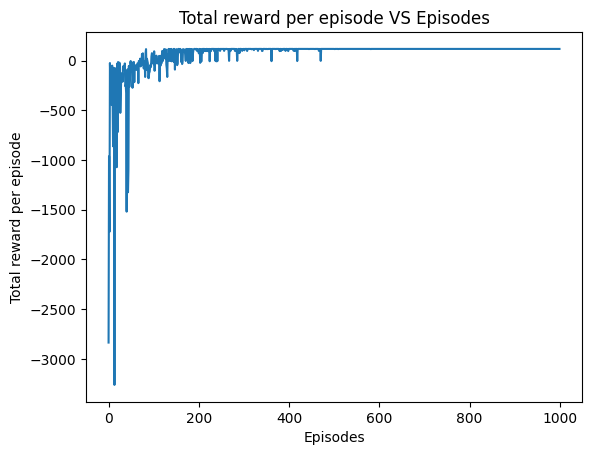

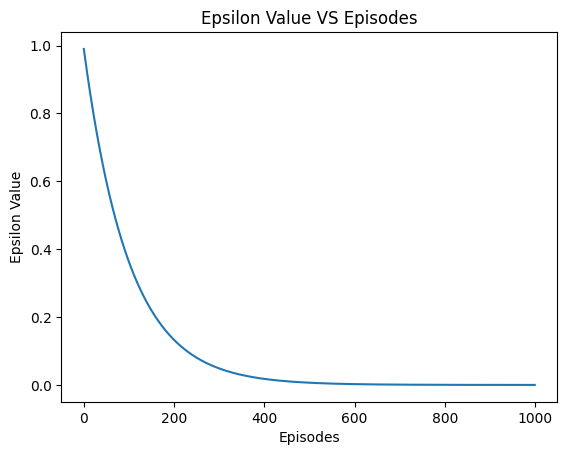

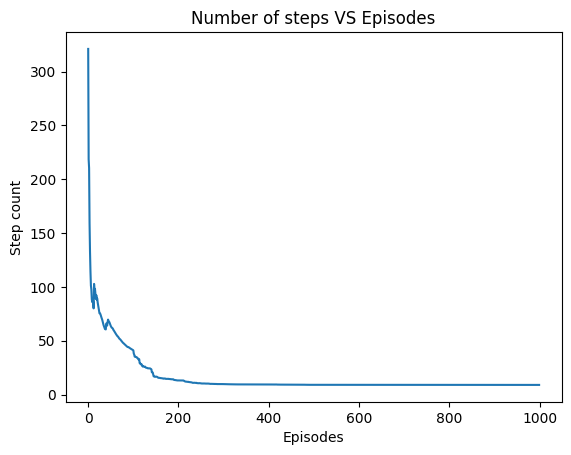

################################################################################
                       Q-values for 1st table after training:
################################################################################
[[[[ 3.57753587e+02  4.45831882e+02  3.40711938e+02  3.83821468e+02
     3.78946016e+02  3.62949820e+02]
   [ 0.00000000e+00 -2.18375585e+01 -9.65853900e+00 -1.80981900e+01
    -2.52900000e+01 -1.97790937e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 3.98068257e+02  1.39757888e+01 -9.36457759e+00 -7.38627642e+00
    -6.61391807e+00 -2.38459953e+01]
   [-2.33525078e+01 -1.56429000e+01  5.25524573e+02 -2.79180197e+01
    -3.80956265e+01 -2.77305549e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 8.80301773e+00  6.16405533e+00 -3.48379094e+00 -1.73895017e+01
    -2.90897503e+01 -9.65346977e+00]
   [-1.83001607e+01  5.86386718e+02 -

In [2]:
run_double_q_learning(1000, is_training=True, render=False, stochastic=False)

### Testing deterministic Environement model for 10 episodes

2025-02-20 13:12:11.566 Python[85926:4688112] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-20 13:12:11.566 Python[85926:4688112] +[IMKInputSession subclass]: chose IMKInputSession_Modern


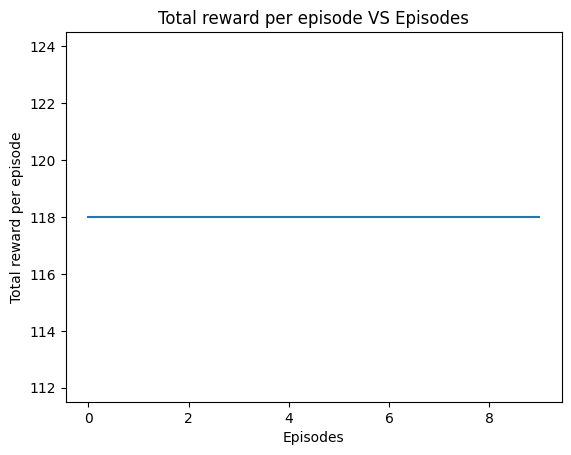

################################################################################
                       Q-values for 1st table after training:
################################################################################
[[[[-2.48625202e+01 -1.04342308e+01  4.45831882e+02  3.81638013e+02
     3.40923293e+02  3.27284654e+02]
   [-1.21980056e+01 -2.39577831e+01 -1.43675475e+01 -1.21251056e+01
    -4.13666315e+01 -2.40298772e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 3.90329500e+02  4.96479869e+02  3.17940180e+02  4.25691132e+02
     4.06755888e+02  1.06122496e+01]
   [-2.57818138e+01 -2.65124541e+01 -3.17948181e+01 -2.92649770e+01
    -4.70113081e+01 -2.06873410e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 4.00104776e+02 -1.24485496e+01 -1.33284689e+01 -1.61234916e+01
    -2.08909909e+01 -2.68756043e+01]
   [-2.84323597e+01 -2.33805221e+01 -

: 

In [3]:
run_double_q_learning(10, is_training=False, render=False, stochastic=False)

2025-02-20 13:16:36.391 Python[88836:4697827] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-20 13:16:36.391 Python[88836:4697827] +[IMKInputSession subclass]: chose IMKInputSession_Modern


R _ _ _ _ _ 
_ S _ _ _ _ 
_ _ _ O _ _ 
_ _ _ _ T _ 
_ O _ O _ _ 
_ _ _ _ _ _ 

Episode 0
R _ _ _ _ _ 
_ S _ _ _ _ 
_ _ _ O _ _ 
_ _ _ _ T _ 
_ O _ O _ _ 
_ _ _ _ _ _ 



/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be int32, actual type: int64
  logger.warn(
/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


RobotAction.DOWN
_ _ _ _ _ _ 
R S _ _ _ _ 
_ _ _ O _ _ 
_ _ _ _ T _ 
_ O _ O _ _ 
_ _ _ _ _ _ 



/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be int32, actual type: int64
  logger.warn(
/Users/rohitbanka/Desktop/RL/warehouse_robot_RL/env/lib/python3.13/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


RobotAction.RIGHT
_ _ _ _ _ _ 
_ R _ _ _ _ 
_ _ _ O _ _ 
_ _ _ _ T _ 
_ O _ O _ _ 
_ _ _ _ _ _ 

RobotAction.PICKUP
_ _ _ _ _ _ 
_ R _ _ _ _ 
_ _ _ O _ _ 
_ _ _ _ T _ 
_ O _ O _ _ 
_ _ _ _ _ _ 

RobotAction.RIGHT
_ _ _ _ _ _ 
_ _ R _ _ _ 
_ _ _ O _ _ 
_ _ _ _ T _ 
_ O _ O _ _ 
_ _ _ _ _ _ 

RobotAction.DOWN
_ _ _ _ _ _ 
_ _ _ _ _ _ 
_ _ R O _ _ 
_ _ _ _ T _ 
_ O _ O _ _ 
_ _ _ _ _ _ 

RobotAction.DOWN
_ _ _ _ _ _ 
_ _ _ _ _ _ 
_ _ _ O _ _ 
_ _ R _ T _ 
_ O _ O _ _ 
_ _ _ _ _ _ 

RobotAction.RIGHT
_ _ _ _ _ _ 
_ _ _ _ _ _ 
_ _ _ O _ _ 
_ _ _ R T _ 
_ O _ O _ _ 
_ _ _ _ _ _ 

RobotAction.RIGHT
_ _ _ _ _ _ 
_ _ _ _ _ _ 
_ _ _ O _ _ 
_ _ _ _ R _ 
_ O _ O _ _ 
_ _ _ _ _ _ 

RobotAction.DROPOFF
_ _ _ _ _ _ 
_ _ _ _ _ _ 
_ _ _ O _ _ 
_ _ _ _ R _ 
_ O _ O _ _ 
_ _ _ _ _ _ 



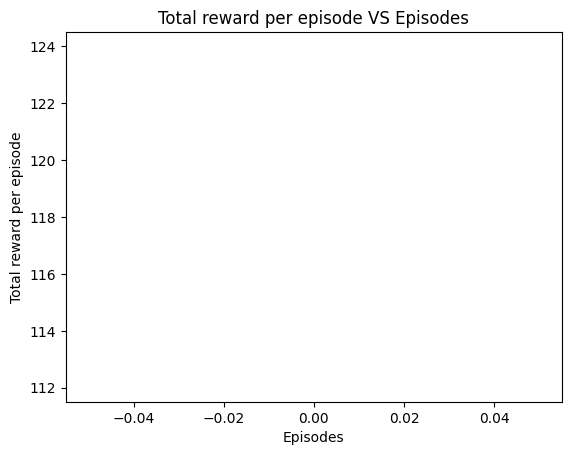

################################################################################
                       Q-values for 1st table after training:
################################################################################
[[[[ 3.57753587e+02  4.45831882e+02  3.40711938e+02  3.83821468e+02
     3.78946016e+02  3.62949820e+02]
   [ 0.00000000e+00 -2.18375585e+01 -9.65853900e+00 -1.80981900e+01
    -2.52900000e+01 -1.97790937e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 3.98068257e+02  1.39757888e+01 -9.36457759e+00 -7.38627642e+00
    -6.61391807e+00 -2.38459953e+01]
   [-2.33525078e+01 -1.56429000e+01  5.25524573e+02 -2.79180197e+01
    -3.80956265e+01 -2.77305549e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 8.80301773e+00  6.16405533e+00 -3.48379094e+00 -1.73895017e+01
    -2.90897503e+01 -9.65346977e+00]
   [-1.83001607e+01  5.86386718e+02 -

: 

In [3]:
run_double_q_learning(1, is_training=False, render=True, stochastic=False)

### Training Stochastic Environement model for 1000 episodes

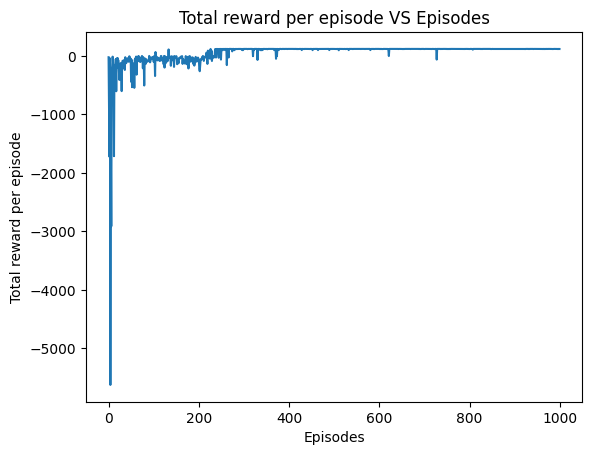

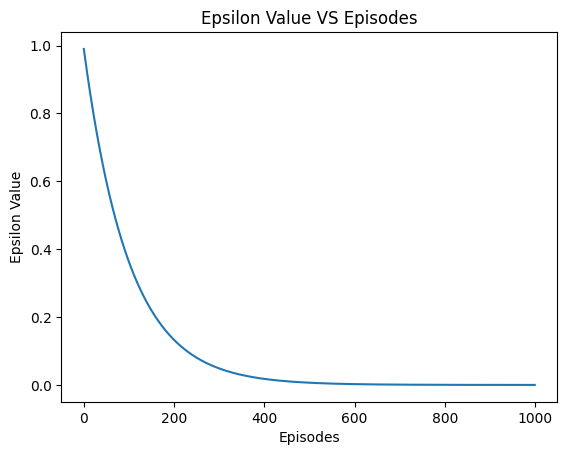

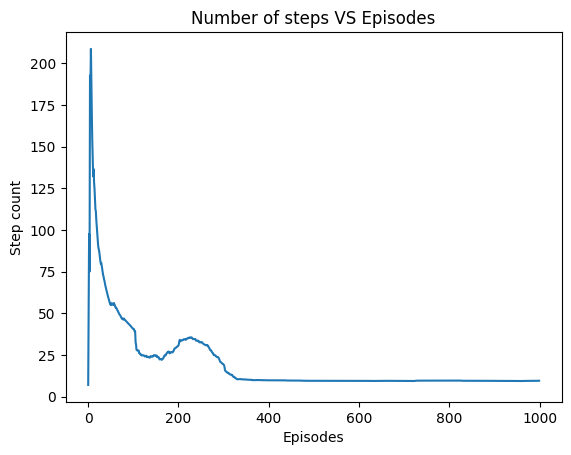

################################################################################
                       Q-values for 1st table after training:
################################################################################
[[[[ 3.53043130e+02  2.73916497e+01  4.44447819e+02 -1.78866254e+01
     1.33810757e+02 -1.01179960e+01]
   [-1.71637245e+01 -1.40152859e+01 -1.10566147e+01 -1.62900000e+01
    -3.85068690e+01 -2.07784709e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[-3.61658131e+00  4.78504566e+02 -1.04055548e+01  1.14745797e+01
     2.09527582e-01  5.62861300e+00]
   [-1.00000000e+01 -2.03660179e+01 -2.54495112e+01 -1.90000000e+01
    -2.90000000e+01 -1.43563003e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[-4.54819380e+00 -7.10290840e+00 -2.29425055e+00 -9.40866322e+00
    -1.28242696e+01 -2.97827572e+01]
   [-1.00000001e+01 -1.07019000e+00 -

In [4]:
run_double_q_learning(1000, is_training=True, render=False, stochastic=True)

### Testing Stochastic Environement model for 10 episodes

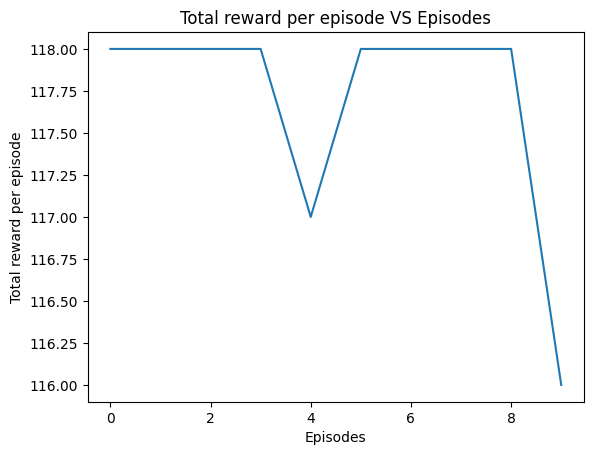

################################################################################
                       Q-values for 1st table after training:
################################################################################
[[[[ 3.53043130e+02  2.73916497e+01  4.44447819e+02 -1.78866254e+01
     1.33810757e+02 -1.01179960e+01]
   [-1.71637245e+01 -1.40152859e+01 -1.10566147e+01 -1.62900000e+01
    -3.85068690e+01 -2.07784709e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[-3.61658131e+00  4.78504566e+02 -1.04055548e+01  1.14745797e+01
     2.09527582e-01  5.62861300e+00]
   [-1.00000000e+01 -2.03660179e+01 -2.54495112e+01 -1.90000000e+01
    -2.90000000e+01 -1.43563003e+01]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[-4.54819380e+00 -7.10290840e+00 -2.29425055e+00 -9.40866322e+00
    -1.28242696e+01 -2.97827572e+01]
   [-1.00000001e+01 -1.07019000e+00 -

: 

In [15]:
run_double_q_learning(10, is_training=False, render=False, stochastic=True)

In [3]:
run_double_q_learning(1, is_training=False, render=True, stochastic=True)

2025-02-20 00:47:22.383 Python[77889:3325254] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-20 00:47:22.383 Python[77889:3325254] +[IMKInputSession subclass]: chose IMKInputSession_Modern


R _ _ _ _ _ 
_ S _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ _ 
_ _ _ T _ _ 

Episode 0
R _ _ _ _ _ 
_ S _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ _ 
_ _ _ T _ _ 

RobotAction.DOWN
_ _ _ _ _ _ 
R S _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ _ 
_ _ _ T _ _ 

RobotAction.RIGHT
_ _ _ _ _ _ 
_ R _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ _ 
_ _ _ T _ _ 

RobotAction.PICKUP
_ _ _ _ _ _ 
_ R _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ _ 
_ _ _ T _ _ 

RobotAction.LEFT
_ _ _ _ _ _ 
R _ _ _ _ _ 
_ _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ _ 
_ _ _ T _ _ 

RobotAction.DOWN
_ _ _ _ _ _ 
_ _ _ _ _ _ 
R _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ _ 
_ _ _ T _ _ 

RobotAction.RIGHT
_ _ _ _ _ _ 
_ _ _ _ _ _ 
_ R _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ _ 
_ _ _ T _ _ 

RobotAction.LEFT
_ _ _ _ _ _ 
_ _ _ _ _ _ 
R _ _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ _ 
_ _ _ T _ _ 

RobotAction.RIGHT
_ _ _ _ _ _ 
_ _ _ _ _ _ 
_ R _ O _ _ 
_ _ O _ _ _ 
_ _ _ O _ _ 
_ _ _ T _ _ 

RobotAction.LEFT
_ _ _ _ _ _ 
_ _ _ _ _ _ 
R _ _ O _ _ 
_ _

KeyboardInterrupt: 